In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis_tes import *

In [2]:
n_sims = 30_000 #Number of phonons, proportional to energy

d1 = 2 # cm 
d2 = 2 # cm
z = 0.04 # cm

#By dividing by the dimensions we see the box as +- 1/2 on all sides
v_fast = 1.1 / (z) #1/mus double check this
v_slow = 0.6 / (d1) #1/mus double check this

w = (0.1/2/d1) #TES dimension is 1 x 1 mm^2 = 0.1 x 0.1 cm^2 express it as a fraction of the linear box dimensions /2 for radius

p_abs = 0.0002  #probability of being absorbed => generalize to array using np random choice non 1D shape (check documentation)

dt = 0.5 #time step of simulation (mus)

In [3]:
#Active
wall_top = np.array((0, 0, 1/2))
wall_bottom = np.array((0, 0, -1/2))
wall_left = np.array((0, -1/2, 0))
wall_right = np.array((0, 1/2, 0))
wall_up = np.array((1/2, 0, 0))
wall_down = np.array((-1/2, 0, 0))

normal_top = np.array((0, 0, -1))
normal_bottom = np.array((0, 0, 1))
normal_left = np.array((0, 1, 0))
normal_right = np.array((0, -1, 0))
normal_up = np.array((-1, 0, 0))
normal_down = np.array((1, 0, 0))

TES_1_position = np.array( (1/4, 1/4, 1/2) )
TES_2_position = np.array( (1/4, -1/4, 1/2) )

wall_positions = np.array([wall_top, wall_bottom, wall_left, wall_right, wall_up, wall_down])
wall_normals = np.array([normal_top, normal_bottom, normal_left, normal_right, normal_up, normal_down])
detector_positions = np.array(([TES_1_position, TES_2_position]))
detector_normals = np.array([normal_top, normal_top])

detector_labels = ["TES_1", "TES_2"]

crystal_geometry = Geometry_TES( wall_positions, detector_positions, wall_normals, detector_normals, detector_labels, w )

analysis = Analysis_TES(v_fast, v_slow, p_abs, crystal_geometry)
analysis.n_sims = n_sims

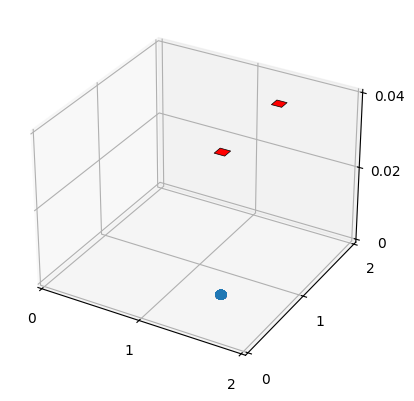

In [4]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

starting_position = np.array((1/4, -1/4, -1/2 + 0.06))

pos, dir = analysis.initialize( starting_position )

pos = pos.T

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D( pos[0]*d1, pos[1]*d2, pos[2]*z, s = 0.0002 )
ax.set_xlim( -d1/2, d1/2 )
ax.set_xticks( [-d1/2, 0, d1/2], [0, int(d1/2), d1] )
ax.set_ylim( -d2/2, d2/2 )
ax.set_yticks( [-d2/2, 0, d2/2], [0, int(d2/2), d2] )
ax.set_zlim( -z/2, z/2 )
ax.set_zticks( [-z/2, 0, z/2], [0, z/2, z])

colors = ["r", "r", "k"]
alpha = [1, 1, 0.3]

scale_array = np.array((d1, d2, z))
pos = np.array(
    (TES_1_position,TES_2_position)
)  * scale_array
points = np.array( 
    (
    (-w, w, w, -w),
    (-w, -w, w, w),
    (0, 0, 0, 0)
    )
).T * scale_array
square_poss = (pos[:,:,None] + points.T)

for k, surface in enumerate(square_poss):
    ax.add_collection3d(Poly3DCollection(surface.T[None, : , :], facecolors=colors[k], edgecolors="k", linewidths=0.5, alpha=alpha[k]))

c:\Users\ludov\OneDrive\Desktop\CRESST\PhononSimulation\Two_Disk_Intersection\CRESST_SIMULATIONS\analysis_tes.py:6: RuntimeWarning: divide by zero encountered in divide
  t = (np.einsum('ik,ijk->ji', n_box, -y0+p0[:, None])/(dir@n_box.T) ).T
c:\Users\ludov\OneDrive\Desktop\CRESST\PhononSimulation\Two_Disk_Intersection\CRESST_SIMULATIONS\analysis_tes.py:15: RuntimeWarning: invalid value encountered in multiply
  return (p_0 + t * dir)


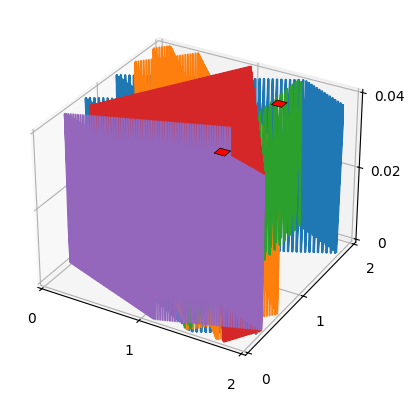

In [5]:
intersected_pos_array, absorbed_phonons = analysis.simulation(starting_position)

fig = plt.figure()
ax = plt.axes(projection='3d')

for i in range(5):
    x_, y_, z_ = intersected_pos_array[:, i, :].T
    ax.plot3D(x_*d1, y_*d2, z_*z)

ax.set_xlim( -d1/2, d1/2 )
ax.set_xticks( [-d1/2, 0, d1/2], [0, int(d1/2), d1] )
ax.set_ylim( -d2/2, d2/2 )
ax.set_yticks( [-d2/2, 0, d2/2], [0, int(d2/2), d2] )
ax.set_zlim( -z/2, z/2 )
ax.set_zticks( [-z/2, 0, z/2], [0, z/2, z])

for k, surface in enumerate(square_poss):
    ax.add_collection3d(Poly3DCollection(surface.T[None,:,:], facecolors=colors[k], edgecolors="k", linewidths=0.5, alpha=alpha[k]))
plt.show()

In [6]:
starting_position = np.array((1/4, -1/4, -1/2 + 0.06))

intersections, absorbed_phonons_1 = analysis.simulation(starting_position)

hist_phonons_1, edges_ss =  analysis.build_hist(absorbed_phonons_1) #Treat this as a baseline
res_ss, t_extra =  analysis.build_response(hist_phonons_1) #Times 2 for same energy intensity

c:\Users\ludov\OneDrive\Desktop\CRESST\PhononSimulation\Two_Disk_Intersection\CRESST_SIMULATIONS\analysis_tes.py:6: RuntimeWarning: divide by zero encountered in divide
  t = (np.einsum('ik,ijk->ji', n_box, -y0+p0[:, None])/(dir@n_box.T) ).T
c:\Users\ludov\OneDrive\Desktop\CRESST\PhononSimulation\Two_Disk_Intersection\CRESST_SIMULATIONS\analysis_tes.py:15: RuntimeWarning: invalid value encountered in multiply
  return (p_0 + t * dir)


In [7]:
n_times = 30
#p_abs_vals = 8 * np.array([0.00005, 0.00008, 0.0001, 0.0002, 0.0003, 0.0004, 0.0008, 0.0016, 0.0032])#, 0.08, 0.2, 0.8]
n_sims = 10_000

starting_position_1 = np.array((0, -1/4, -1/2 + 0.06))
starting_position_2 = np.array((0, 1/4, -1/2 + 0.06))
charges_arr_1 = []
charges_arr_2 = []
charges_arr = []

p_in = 0.0064

analysis = Analysis_TES(v_fast, v_slow, p_in, crystal_geometry)
analysis.n_sims = n_sims

for i in range(n_times):

    _, absorbed_phonons_1 = analysis.simulation(starting_position_1)
    hist_phonons_1, edges_ss =  analysis.build_hist(absorbed_phonons_1) #Treat this as a baseline

    _, absorbed_phonons_2 = analysis.simulation(starting_position_2)
    hist_phonons_2, edges_ss =  analysis.build_hist(absorbed_phonons_2) #Treat this as a baseline

    charges_1 = np.sum(hist_phonons_1, 1)
    charges_2 = np.sum(hist_phonons_2, 1)

    charges_arr_1.append( (charges_1) ) #Add identifier
    charges_arr_2.append( (charges_2) ) #Add identifier

    # i c_1 c_2 or in other words i c1_1 c1_2 c2_1 c2_2
    charges_arr.append( (charges_1, charges_2) ) #Add identifier 

In [8]:
charges_arr_1 = np.array(charges_arr_1)
charges_arr_2 = np.array(charges_arr_2)
charges_arr = np.array(charges_arr)

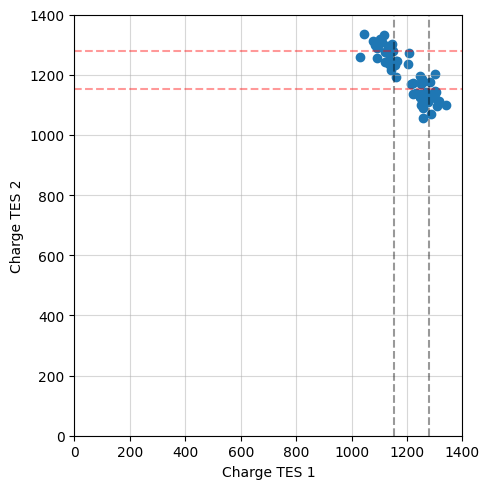

Sigma of the fit is 39 compared to poissonian 49, the ratio is 1.24 and sqrt(2) is 1.41


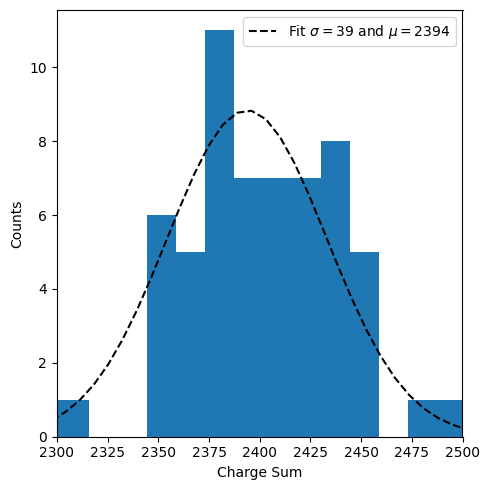

In [11]:
from scipy.optimize import curve_fit
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

charge_flat = charges_arr.reshape(-1, 2)
plt.figure(figsize=(5, 5))
plt.scatter(charge_flat[:, 0], charge_flat[:, 1])
plt.xlim(0, 1400)
plt.ylim(0, 1400)
plt.xlabel("Charge TES 1")
plt.ylabel("Charge TES 2")
plt.tight_layout()
plt.grid(alpha=0.5)

plt.hlines( [1152, 1280], 0, 1400, colors="r", linestyles="dashed", alpha=0.4)
plt.vlines( [1152, 1280], 0, 1400, colors="k", linestyles="dashed", alpha=0.4)

plt.show()

#summed charge
charge_sum = np.sum(charge_flat, 1)
bins = 15
charge_hist, edges = np.histogram(charge_sum, bins=bins)

plt.figure(figsize=(5, 5))
plt.hist(charge_sum, bins=bins)

n = len(charge_hist)                        
mean = np.mean(charge_sum)
sigma = np.std(charge_sum)  
popt,pcov = curve_fit(gaus, edges[:-1], charge_hist, p0=[1,mean,sigma])
x = np.linspace(2000, 2700, 100)
plt.plot(x, gaus(x,*popt), '--k', label=f"Fit $\sigma = {popt[-1]:.0f}$ and $\mu = {popt[1]:.0f}$")
plt.xlabel("Charge Sum")
plt.ylabel("Counts")
plt.xlim(2300, 2500)
plt.tight_layout()
plt.legend()
print(f"Sigma of the fit is {popt[-1]:.0f} compared to poissonian {np.sqrt(mean):.0f}, the ratio is {np.sqrt(mean)/popt[-1]:.2f} and sqrt(2) is {np.sqrt(2):.2f}")
plt.show()

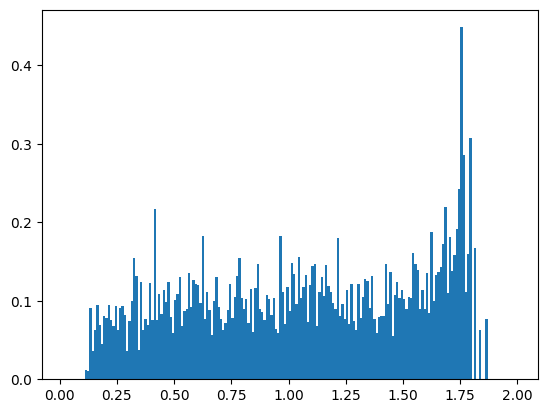

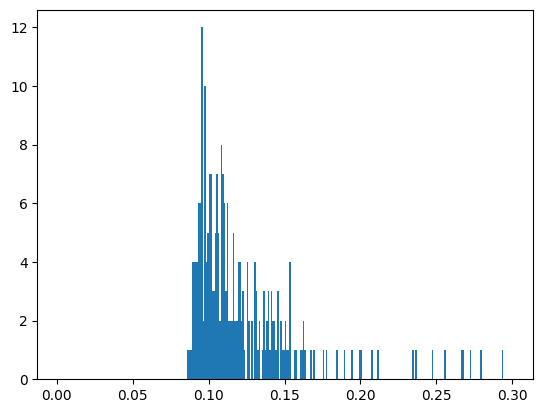

In [97]:
x, y = np.loadtxt("datafiles\Absorber_Ch1_20eVbins.xy", skiprows=3, delimiter="\t").T
w = np.diff(x)[0]

plt.bar(x, y, width=w)
plt.show()

x, y = np.loadtxt("datafiles\spectrum_coinc_Ch2.xy", skiprows=3, delimiter="\t").T
w = np.diff(x)[0]
plt.bar(x, y, width=w)
plt.show()


In [13]:
charge_flat.shape

np.savetxt("Double_charge.txt", charge_flat, fmt="%d")

In [ ]:
x, y = charge_flat[:, 0], charge_flat[:, 1]